In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Task3.xlsx') ## подгружаем экселевский файл с исходными данными

In [3]:
df.head()

,transaction_id,pay_date,user_id,name,price,month_access,order_description,status
0,52309,2017-03-01,46796,Наталья,590,1,Подписка на 1 месяц,Successful
1,52370,2017-03-02,49343,Сергей Плешаков,590,1,Подписка на 1 месяц,Successful
2,52393,2017-03-02,50693,Алеся Бията,1470,3,Подписка на 3 месяца,Successful
3,52358,2017-03-02,51467,Лия,590,1,Подписка на 1 месяц,Successful
4,52246,2017-03-03,35265,Анастасия Высочинская,2340,6,Подписка на 6 месяцев,Successful


## Создаем: first_date - это самая ранняя дата первой сделки для каждого пользователя.

## Создаем пары столбцов: месяц-год, квартал-год, неделя-год для столбцов pay_date и first_date 
##



In [4]:
df['first_date'] = df.groupby('user_id')['pay_date'].transform('min')
df['first_week_year_deal'] = 'W' + '_'+ df['first_date'].dt.strftime('%U-%Y')  # Неделя-год
df['wy'] = 'W' + '_'+ df['pay_date'].dt.strftime('%U-%Y')  # Неделя-год
df['first_month_year_deal'] = df['first_date'].dt.strftime('%B-%Y') # Месяц-год
df['ym'] = df['pay_date'].dt.strftime('%B-%Y') # Месяц-год
df['first_quarter_year_deal'] = 'Q' + df['first_date'].dt.quarter.astype(str) + '_' + df['first_date'].dt.year.astype(str)  # Квартал-год
df['qy'] = 'Q' + df['pay_date'].dt.quarter.astype(str) + '_' + df['pay_date'].dt.year.astype(str)  # Квартал-год
df

,transaction_id,pay_date,user_id,name,price,month_access,order_description,status,first_date,first_week_year_deal,wy,first_month_year_deal,ym,first_quarter_year_deal,qy
0,52309,2017-03-01,46796,Наталья,590,1,Подписка на 1 месяц,Successful,2017-03-01,W_09-2017,W_09-2017,March-2017,March-2017,Q1_2017,Q1_2017
1,52370,2017-03-02,49343,Сергей Плешаков,590,1,Подписка на 1 месяц,Successful,2017-03-02,W_09-2017,W_09-2017,March-2017,March-2017,Q1_2017,Q1_2017
2,52393,2017-03-02,50693,Алеся Бията,1470,3,Подписка на 3 месяца,Successful,2017-03-02,W_09-2017,W_09-2017,March-2017,March-2017,Q1_2017,Q1_2017
3,52358,2017-03-02,51467,Лия,590,1,Подписка на 1 месяц,Successful,2017-03-02,W_09-2017,W_09-2017,March-2017,March-2017,Q1_2017,Q1_2017
4,52246,2017-03-03,35265,Анастасия Высочинская,2340,6,Подписка на 6 месяцев,Successful,2017-03-03,W_09-2017,W_09-2017,March-2017,March-2017,Q1_2017,Q1_2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,105162,2017-10-31,833154,Алексей,590,1,Подписка на 1 месяц,Successful,2017-10-01,W_40-2017,W_44-2017,October-2017,October-2017,Q4_2017,Q4_2017
2544,102930,2017-10-31,984982,Виктория Попова,590,1,Подписка на 1 месяц,Successful,2017-10-31,W_44-2017,W_44-2017,October-2017,October-2017,Q4_2017,Q4_2017
2545,104902,2017-10-31,1071653,Евгений,590,1,Подписка на 1 месяц,Successful,2017-10-31,W_44-2017,W_44-2017,October-2017,October-2017,Q4_2017,Q4_2017
2546,104924,2017-10-31,1073134,Максим,590,1,Подписка на 1 месяц,Successful,2017-10-31,W_44-2017,W_44-2017,October-2017,October-2017,Q4_2017,Q4_2017


## Строим двухмерную сводную табличку(шахматку) с расчетом количества уникальных пользователей по каждому месяцу первой сделки и по каждому месяцу

In [5]:
cohorts = pd.pivot_table(
    df,
    index='first_month_year_deal',
    columns='ym',
    values='user_id',
    aggfunc='nunique'
).fillna(0).astype(int)

# Сортировка индексов и столбцов
cohorts.index = pd.to_datetime(cohorts.index, format='%B-%Y')  # Преобразование индекса в datetime
cohorts = cohorts.sort_index()  # Сортировка индекса
cohorts.columns = pd.to_datetime(cohorts.columns, format='%B-%Y')  # Преобразование столбцов в datetime
cohorts = cohorts.sort_index(axis=1)  # Сортировка столбцов

# Преобразование индекса и столбцов обратно в формат 'Месяц-Год' для отображения
cohorts.index = cohorts.index.strftime('%B-%Y')
cohorts.columns = cohorts.columns.strftime('%B-%Y')

cohorts

ym,March-2017,April-2017,May-2017,June-2017,July-2017,August-2017,September-2017,October-2017
first_month_year_deal,,,,,,,,
March-2017,125,42,20,17,18,0,0,0
April-2017,0,155,67,35,24,14,0,0
May-2017,0,0,132,54,31,20,14,0
June-2017,0,0,0,137,60,31,24,22
July-2017,0,0,0,0,194,68,32,36
August-2017,0,0,0,0,0,202,100,62
September-2017,0,0,0,0,0,0,330,121
October-2017,0,0,0,0,0,0,0,346


## Переводим табличку в проценты, чтобы продемонстрировать какая доля пользователей вновь совершила сделку в n+m месяце от месяца первой сделки

In [6]:
diags = np.diag(cohorts)

cohorts = cohorts.div(diags, axis=0)

cohorts

ym,March-2017,April-2017,May-2017,June-2017,July-2017,August-2017,September-2017,October-2017
first_month_year_deal,,,,,,,,
March-2017,1.0,0.336,0.160000,0.136000,0.144000,0.000000,0.000000,0.000000
April-2017,0.0,1.000,0.432258,0.225806,0.154839,0.090323,0.000000,0.000000
May-2017,0.0,0.000,1.000000,0.409091,0.234848,0.151515,0.106061,0.000000
June-2017,0.0,0.000,0.000000,1.000000,0.437956,0.226277,0.175182,0.160584
July-2017,0.0,0.000,0.000000,0.000000,1.000000,0.350515,0.164948,0.185567
August-2017,0.0,0.000,0.000000,0.000000,0.000000,1.000000,0.495050,0.306931
September-2017,0.0,0.000,0.000000,0.000000,0.000000,0.000000,1.000000,0.366667
October-2017,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


## Формируем помесячную когортную матрицу. 
## На основе сформированной когортной матрице видно, что на второй месяц после первой сделки совершают повтроно сделаку от 34% (в мартовской кагорте) до 50%( в августовской) пользователей. Однако на третий месяц, доля пользователей, повторно совершивших покупку резко падает и находится в диапазоне от 16% до 31%. Падение retention может свидетельсвовать о недостаточно эффективный маркетинговых акций, направленных на удержание постоянных клиентов.

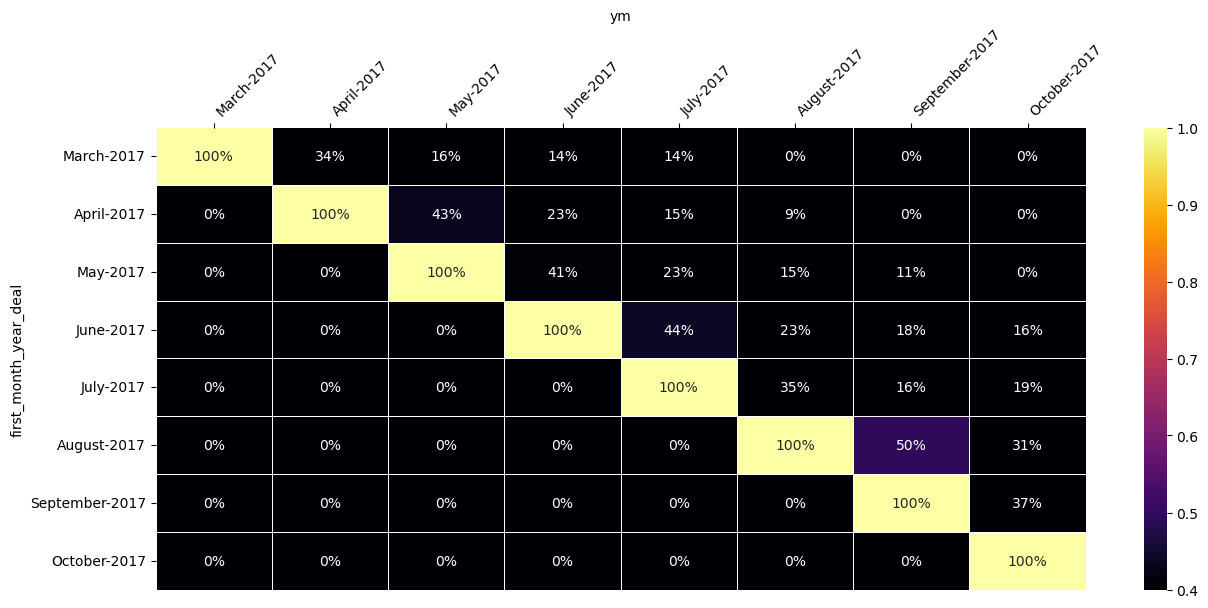

In [7]:
f, ax = plt.subplots(figsize=(15, 6))

sns.heatmap(
    cohorts,
    annot=True,
    fmt='.0%',
    linewidth=0.5,
    vmin=0.4,
    vmax=np.percentile(cohorts, 90),
    cmap='inferno'

);

ax.xaxis.set_label_position('top');
ax.xaxis.tick_top();

plt.xticks(rotation=45, ha='left');

## Формируем поквартальную когортную матрицу 

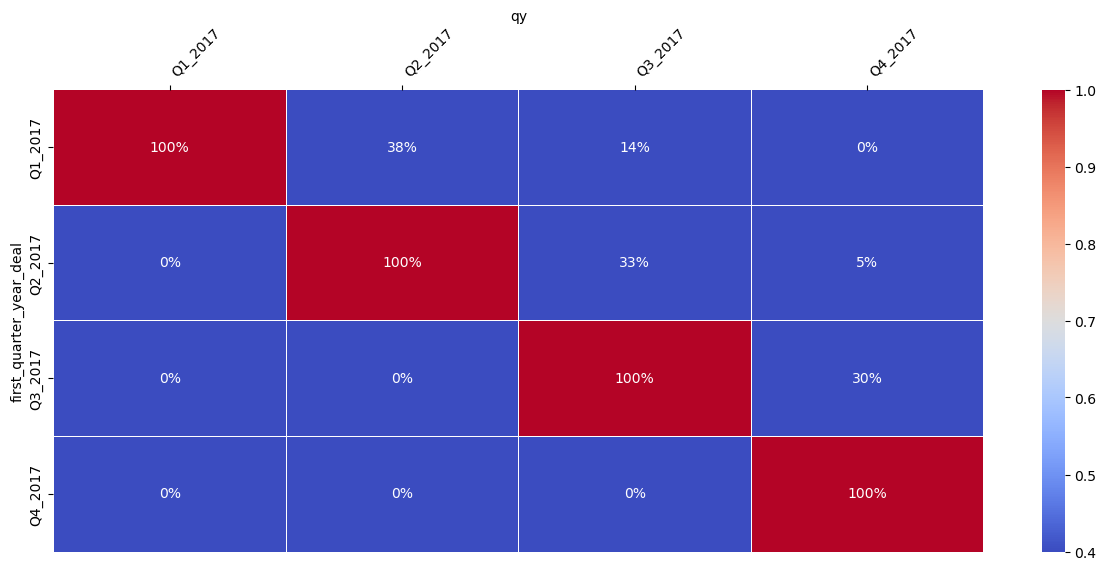

In [8]:
cohorts_q = pd.pivot_table(
    df,
    index='first_quarter_year_deal',
    columns='qy',
    values='user_id',
    aggfunc='nunique'
).fillna(0).astype(int)

diags = np.diag(cohorts_q)
cohorts_q = cohorts_q.div(diags, axis=0)
f, ax = plt.subplots(figsize=(15, 6))

sns.heatmap(
    cohorts_q,
    annot=True,
    fmt='.0%',
    linewidth=0.5,
    vmin=0.4,
    vmax=np.percentile(cohorts, 90),
    cmap='coolwarm'


);

ax.xaxis.set_label_position('top');
ax.xaxis.tick_top();

plt.xticks(rotation=45, ha='left');

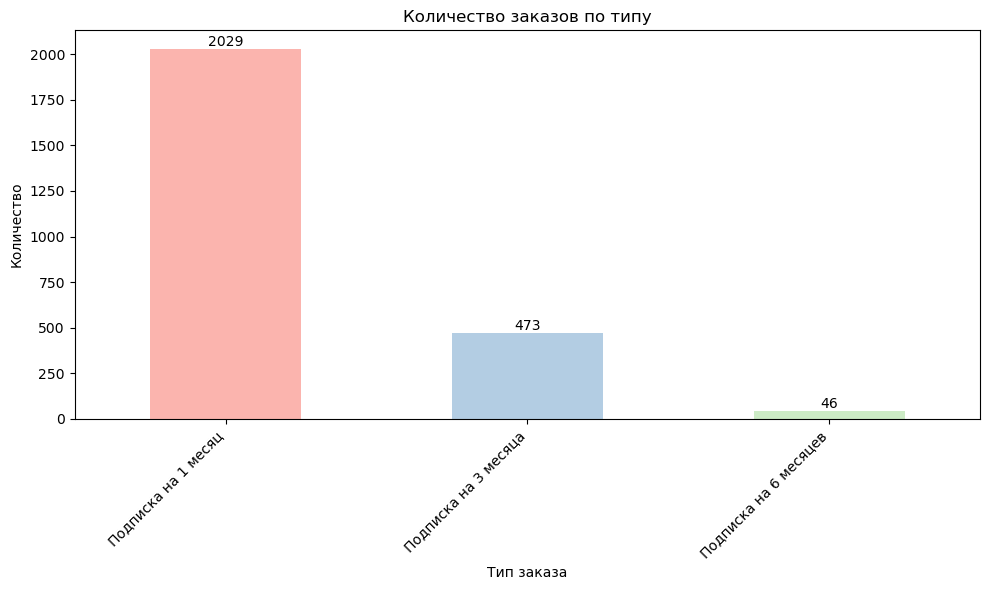

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Предполагается, что ваш DataFrame называется 'df' и содержит столбец 'order_description'.

# 1. Группировка и подсчет количества
order_counts = df.groupby('order_description')['order_description'].count()

# 2. Построение графика
plt.figure(figsize=(10, 6)) 
ax = order_counts.plot(kind='bar', color=cm.Pastel1.colors)  # Пастельные цвета
plt.title('Количество заказов по типу')
plt.xlabel('Тип заказа')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')  
ax.bar_label(ax.containers[0])  
plt.tight_layout()  
plt.show()

In [10]:
total_price = df['price'].sum()

In [11]:
df['Weight'] = df['price'] / total_price
df

,transaction_id,pay_date,user_id,name,price,month_access,order_description,status,first_date,first_week_year_deal,wy,first_month_year_deal,ym,first_quarter_year_deal,qy,Weight
0,52309,2017-03-01,46796,Наталья,590,1,Подписка на 1 месяц,Successful,2017-03-01,W_09-2017,W_09-2017,March-2017,March-2017,Q1_2017,Q1_2017,0.000295
1,52370,2017-03-02,49343,Сергей Плешаков,590,1,Подписка на 1 месяц,Successful,2017-03-02,W_09-2017,W_09-2017,March-2017,March-2017,Q1_2017,Q1_2017,0.000295
2,52393,2017-03-02,50693,Алеся Бията,1470,3,Подписка на 3 месяца,Successful,2017-03-02,W_09-2017,W_09-2017,March-2017,March-2017,Q1_2017,Q1_2017,0.000735
3,52358,2017-03-02,51467,Лия,590,1,Подписка на 1 месяц,Successful,2017-03-02,W_09-2017,W_09-2017,March-2017,March-2017,Q1_2017,Q1_2017,0.000295
4,52246,2017-03-03,35265,Анастасия Высочинская,2340,6,Подписка на 6 месяцев,Successful,2017-03-03,W_09-2017,W_09-2017,March-2017,March-2017,Q1_2017,Q1_2017,0.001170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,105162,2017-10-31,833154,Алексей,590,1,Подписка на 1 месяц,Successful,2017-10-01,W_40-2017,W_44-2017,October-2017,October-2017,Q4_2017,Q4_2017,0.000295
2544,102930,2017-10-31,984982,Виктория Попова,590,1,Подписка на 1 месяц,Successful,2017-10-31,W_44-2017,W_44-2017,October-2017,October-2017,Q4_2017,Q4_2017,0.000295
2545,104902,2017-10-31,1071653,Евгений,590,1,Подписка на 1 месяц,Successful,2017-10-31,W_44-2017,W_44-2017,October-2017,October-2017,Q4_2017,Q4_2017,0.000295
2546,104924,2017-10-31,1073134,Максим,590,1,Подписка на 1 месяц,Successful,2017-10-31,W_44-2017,W_44-2017,October-2017,October-2017,Q4_2017,Q4_2017,0.000295
